# Executables
Vcsn comes with a set of programs that you use to manipulate automata, expressions, etc.

It is much less powerful than writing Python programs, however it comes handy occasionally to process a batch of files, or for a quick experiment.

## Synopsis

    vcsn COMMAND [OPTION...] ARG...
    
Run `vcsn tafkit --help` for details on the interface:

In [1]:
!vcsn tafkit --help

usage: /Users/akim/src/lrde/2/_build/36s/libexec/.libs/vcsn-tafkit COMMAND [OPTIONS...] [ARGS...]

General Options:
  -h, --help       display this help message and exit successfully
  -v, --version    display version information and exit successfully
  -c, --commands   display the supported commands and exit successfully

Available COMMANDs:
  accessible add are-equivalent are-isomorphic cat coaccessible
  complement complete compose constant-term conjunction derivation
  derived-term de-bruijn divkbaseb determinize difference divkbaseb
  double-ring eliminate-state enumerate evaluate expand inductive
  infiltrate is-ambiguous is-complete is-deterministic is-empty
  is-eps-acyclic is-normalized is-proper is-standard is-trim
  is-useless is-valid ladybird lweight lift minimize multiply proper
  quotkbaseb rweight shortest shuffle split standard star
  star-normal-form thompson to-expression transpose trim u union
  universal

Input/Output:
  -C CONTEXT    the context to use
           

## Examples
To generate the standard automaton of `[ab]*c` and save it in `abc.gv`:

In [2]:
!vcsn standard -Ee '[ab]*c' -o abc.gv

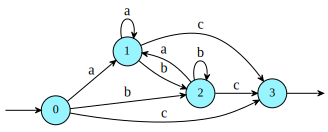

In [3]:
import vcsn
vcsn.automaton(filename='abc.gv')

To generate a Thompson automaton, make it proper, minimize it and extract a rational expression from it:

In [4]:
!vcsn thompson -Ee '[ab]*c' | vcsn proper | vcsn determinize | vcsn to-expression

c+aa*c+(b+aa*b)(b+aa*b)*(c+aa*c)


Likewise, but with an additional minimization step:

In [5]:
!vcsn thompson -Ee '[ab]*c' | vcsn proper | vcsn determinize | vcsn minimize | vcsn to-expression

(a+b)*c


The Python equivalent of these last runs are:

In [6]:
vcsn.B.expression('[ab]*c').thompson().proper().determinize().expression()

c+aa*c+(b+aa*b)(b+aa*b)*(c+aa*c)

In [7]:
vcsn.B.expression('[ab]*c').thompson().proper().determinize().minimize().expression()

(a+b)*c